# 🛩️ Data Visualization and Distance Calculation 🌍

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import folium
from folium.plugins import MarkerCluster
from folium.features import DivIcon
from branca.colormap import LinearColormap

from mpl_toolkits.mplot3d import Axes3D

In [18]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import iplot

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
airport_data = pd.read_csv('airports_data.csv')

In [21]:
airport_data.head()

,Unnamed: 0,name,iata,icao,lat,lon,country,alt
0,0,A Coruna Airport,LCG,LECO,43.302059,-8.377250,Spain,326
1,1,Aachen Merzbruck Airport,AAH,EDKA,50.823051,6.186111,Germany,623
2,2,Aalborg Airport,AAL,EKYT,57.092781,9.849164,Denmark,10
3,3,Aarhus Airport,AAR,EKAH,56.300011,10.619000,Denmark,82
4,4,Aarhus Sea Airport,QEA,EKAC,56.151993,10.247725,Denmark,1


In [22]:
maps = folium .Map(location=[0,0], zoom_start=2, titles='')

colormap = LinearColormap(colors=['green', 'blue', 'red'], 
                          index=[airport_data['alt'].min(),
                                 airport_data['alt'].mean(),
                                 airport_data['alt'].max(),
                                 ],
                                 vmin=airport_data['alt'].min(),
                                 vmax=airport_data['alt'].max()
                          )




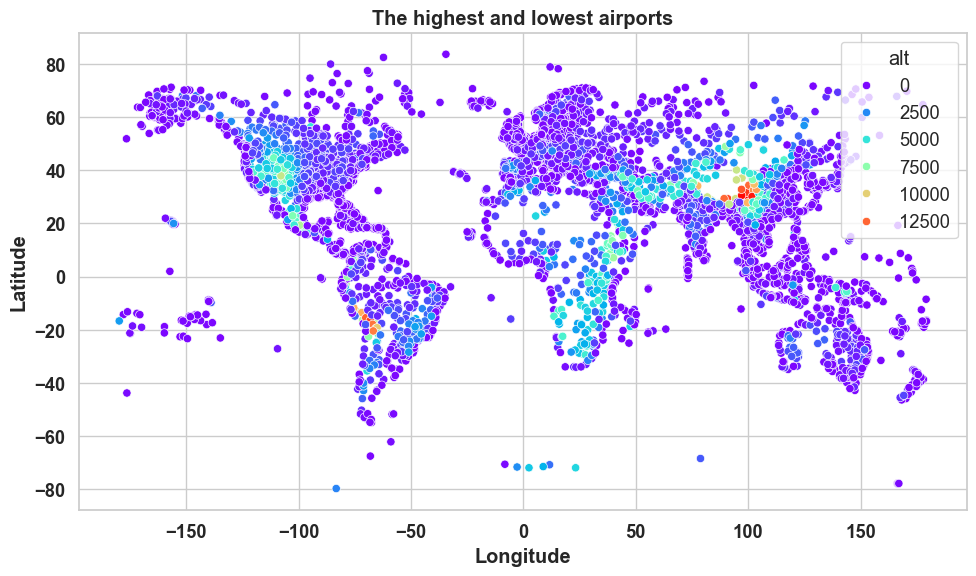

In [23]:
sns.set(style='whitegrid', font_scale=1.2)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=airport_data, x='lon', y='lat', hue='alt', palette='rainbow')
plt.title('The highest and lowest airports', fontweight='bold')
plt.xlabel('Longitude', fontweight='bold')
plt.ylabel('Latitude', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()

# maps.save('airports_map.html')

plt.show()

## Data Preparation for Asian Continents:

In [24]:
asian_countries = [
    "Afghanistan",
    "Armenia",
    "Azerbaijan",
    "Bahrain",
    "Bangladesh",
    "Bhutan",
    "Brunei",
    "Cambodia",
    "China",
    "Cyprus",
    "Georgia",
    "India",
    "Indonesia",
    "Iran",
    "Iraq",
    "Israel",
    "Japan",
    "Jordan",
    "Kazakhstan",
    "Kuwait",
    "Kyrgyzstan",
    "Laos",
    "Lebanon",
    "Malaysia",
    "Maldives",
    "Mongolia",
    "Myanmar",
    "Nepal",
    "North Korea",
    "Oman",
    "Pakistan",
    "Palestine",
    "Philippines",
    "Qatar",
    "Russia",
    "Saudi Arabia",
    "Singapore",
    "South Korea",
    "Sri Lanka",
    "Syria",
    "Taiwan",
    "Tajikistan",
    "Thailand",
    "Timor-Leste",
    "Turkey",
    "Turkmenistan",
    "United Arab Emirates",
    "Uzbekistan",
    "Vietnam",
    "Yemen"
]

filtered_data = airport_data[airport_data['country'].isin(asian_countries)]

### Visualizing the Data

In [25]:
maps = folium.Map(location=[0,0], zoom_start=2, tiles='CartoDB dark_matter')
colormap = LinearColormap(colors=['green', 'yellow', 'red'],
                          index=[filtered_data['alt'].min(), filtered_data['alt'].mean(), filtered_data['alt'].max()],
                          vmin=filtered_data['alt'].min(),
                          vmax=filtered_data['alt'].max())

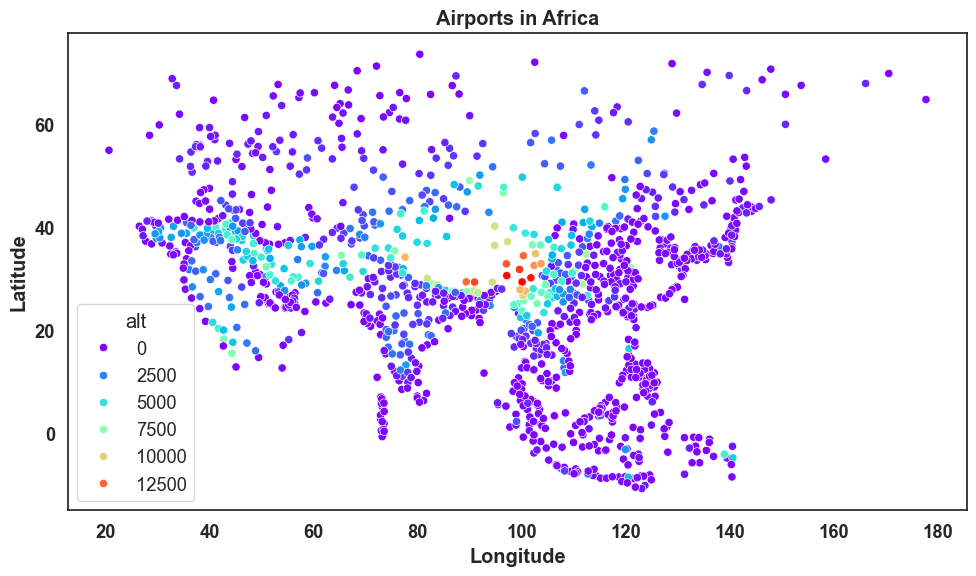

In [26]:
sns.set(style='white', font_scale=1.2)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='lon', y='lat', hue='alt', palette='rainbow')
plt.title('Airports in Africa', fontweight='bold')
plt.xlabel('Longitude', fontweight='bold')
plt.ylabel('Latitude', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()

# maps.save('asian_airports_map_1.html')

plt.show()

## iplot()

In [27]:
fig = px.scatter(filtered_data, x='lon', y='lat', color='alt', title='Airports in Asia',
                 labels={'lon': 'Longitude', 'lat': 'Latitude'}, color_continuous_scale='rainbow',
                 hover_name='name'
                 )
fig.update_traces(marker=dict(size=3))
fig.show()


## Interactive Maps of Airports in Asian Countries

In [28]:
asian_countries_map = folium.Map(location=[30, 100], zoom_start=3)

country_dict = {}

for index, row in filtered_data.iterrows():
    country = row['country']
    popups = ""
    for column, value in row.items():
        popups += "{} : {}<br>".format(column.capitalize(), value)
    location = [row['lat'], row['lon']]
    if country not in country_dict:
        country_dict[country] = folium.FeatureGroup(name=country)
        country_dict[country].add_to(asian_countries_map)
    folium.Marker(
        location=location,
        popup=popups,
        icon=folium.Icon(icon='plane', color='green')
    ).add_to(country_dict[country])

folium.LayerControl().add_to(asian_countries_map)

asian_countries_map.save('asian_airports_map_2.html')

asian_countries_map

## Barplot of Top 20 countries with most Airports

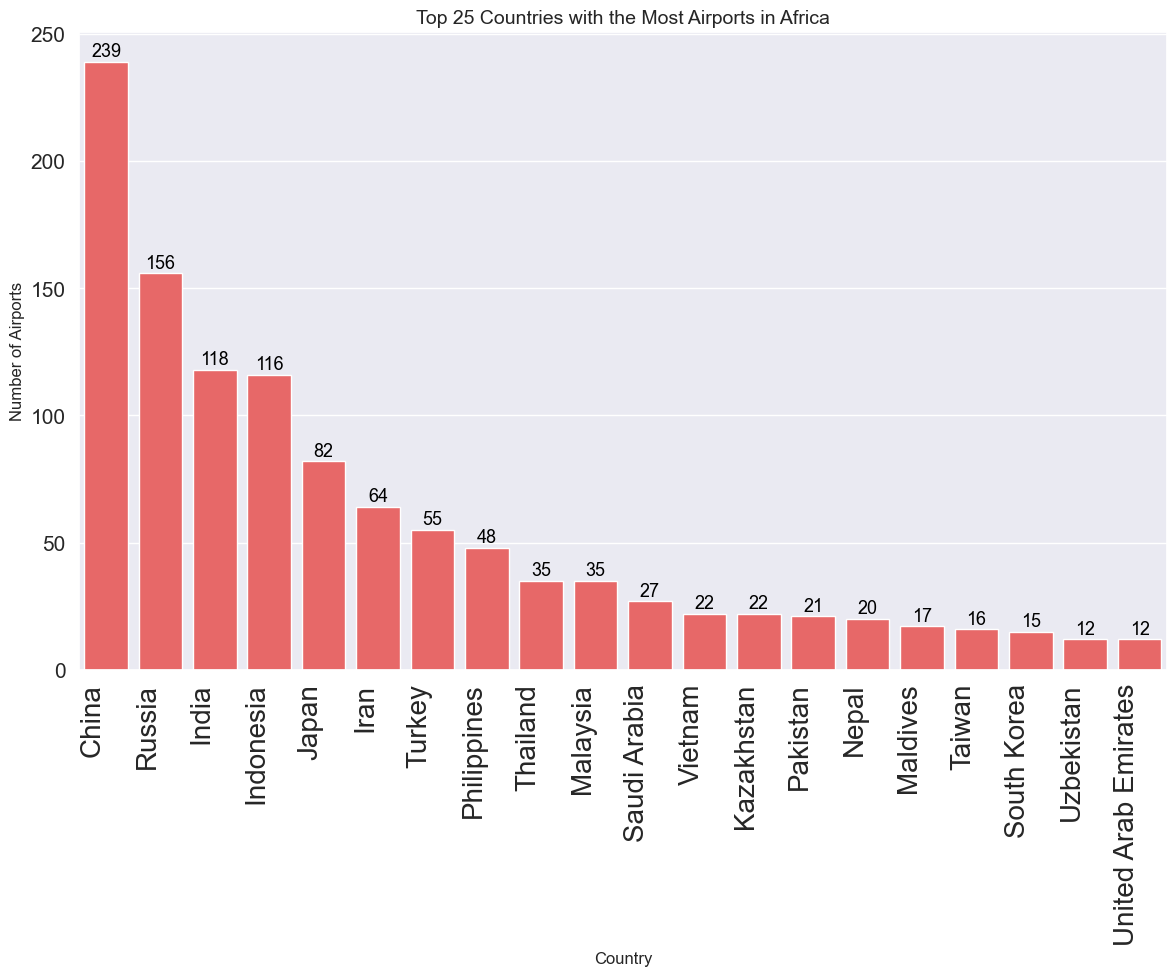

In [29]:
country_counts = filtered_data['country'].value_counts().nlargest(20)

sns.set_style('darkgrid')

plt.figure(figsize=(12, 10))
bars = sns.barplot(x=country_counts.index, y=country_counts.values, color='#fc5353')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Airports', fontsize=12)
plt.title('Top 25 Countries with the Most Airports in Africa', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=20)
plt.yticks(fontsize=15)
plt.tight_layout()

for bar, count in zip(bars.patches, country_counts.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, count, 
             ha='center', va='bottom', fontsize=13, color='black'
             )

plt.show()

## Lets Make a 3D scatterplot of Airports in Asia

In [30]:
airport_data.head()

,Unnamed: 0,name,iata,icao,lat,lon,country,alt
0,0,A Coruna Airport,LCG,LECO,43.302059,-8.377250,Spain,326
1,1,Aachen Merzbruck Airport,AAH,EDKA,50.823051,6.186111,Germany,623
2,2,Aalborg Airport,AAL,EKYT,57.092781,9.849164,Denmark,10
3,3,Aarhus Airport,AAR,EKAH,56.300011,10.619000,Denmark,82
4,4,Aarhus Sea Airport,QEA,EKAC,56.151993,10.247725,Denmark,1


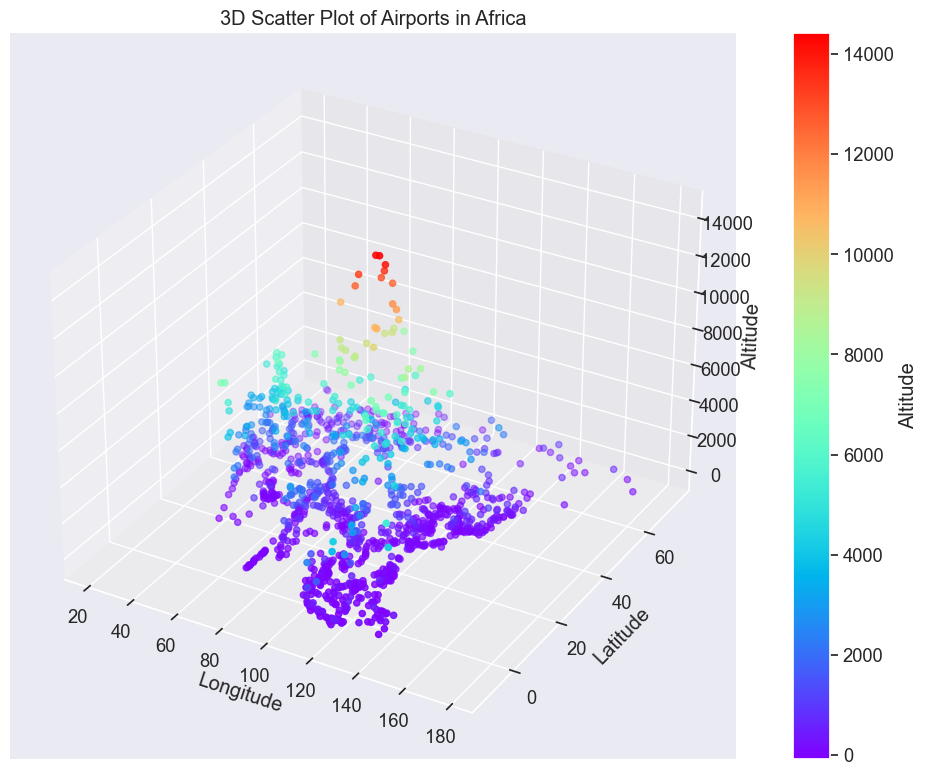

In [31]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(filtered_data['lon'], filtered_data['lat'], filtered_data['alt'],
           c=filtered_data['alt'], cmap='rainbow', marker='o'
           )

scatter

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Altitude')
plt.title('3D Scatter Plot of Airports in Africa')

cbar = plt.colorbar(scatter)
cbar.set_label('Altitude')


plt.tight_layout()
plt.show()



### 3D iplot() of Airports in asian countries.

In [32]:
trace = go.Scatter3d(
    x=filtered_data['lon'],
    y=filtered_data['lat'],
    z=filtered_data['alt'],
    mode='markers',
    marker=dict(
        size=2,
        color=filtered_data['alt'],
        colorscale = 'Rainbow',
        opacity=0.8
    ),
    text=filtered_data['name'],
    hoverinfo='text',
)

layout = go.Layout(
    title='3D Scatter Plot of Airports',
    scene=dict(
        xaxis=dict(title='Longitude'),
        yaxis=dict(title='Latitude'),
        zaxis=dict(title='Altitude'),
    )
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)
